In [51]:
import numba
import numpy as np
from math import exp, log, e, sqrt

kT = 2 / log(1 + sqrt(2), e)

@numba.jit(nopython=True)
def _update(x, i, j):
    n, m = x.shape
    dE = 2* x[i, j] * (
                     x[(i-1)%n, (j-1)%m]
                   + x[(i-1)%n,  j     ]
                   + x[(i-1)%n, (j+1)%m]

                   + x[ i     , (j-1)%m]
                   + x[ i     , (j+1)%m]

                   + x[(i+1)%n, (j-1)%m]
                   + x[(i+1)%n,  j     ]
                   + x[(i+1)%n, (j+1)%m]
                   )
    if dE <= 0 or exp(-dE / kT) > np.random.random():
        x[i, j] *= -1

@numba.jit(nopython=True)
def update(x):
    n, m = x.shape

    for i in range(n):
        for j in range(0, m, 2):  # Even columns first to avoid overlap
            _update(x, i, j)

    for i in range(n):
        for j in range(1, m, 2):  # Odd columns second to avoid overlap
            _update(x, i, j)

if __name__ == '__main__':
    x = np.random.randint(2, size=(1000, 1000)).astype('i1')
    x[x == 0] = -1
    for i in range(100):
        update(x)

In [52]:
# from PIL import Image

# def display_spin_field(field):
#     return Image.fromarray(np.uint8((field + 1)*0.5*255))

# display_spin_field(x)

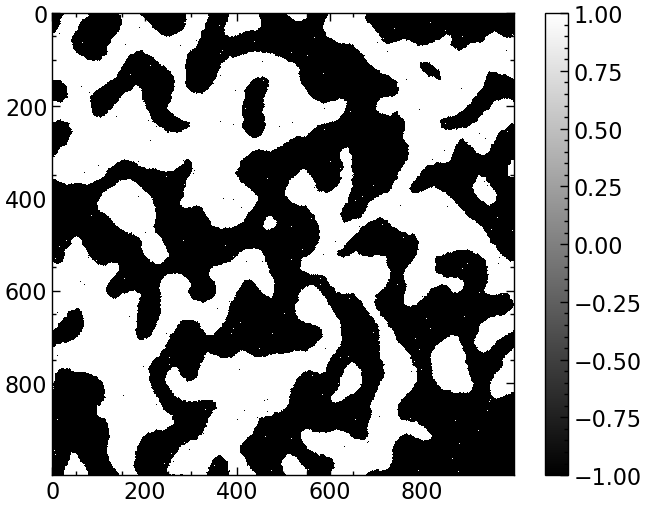

In [53]:
from matplotlib import pyplot as plt
import scienceplots
plt.style.use(['science','nature','notebook'])

plt.imshow(x, interpolation='nearest', cmap='gray')
plt.colorbar()

Text(0.5, 1.0, 'Histogram of the distribution of spin')

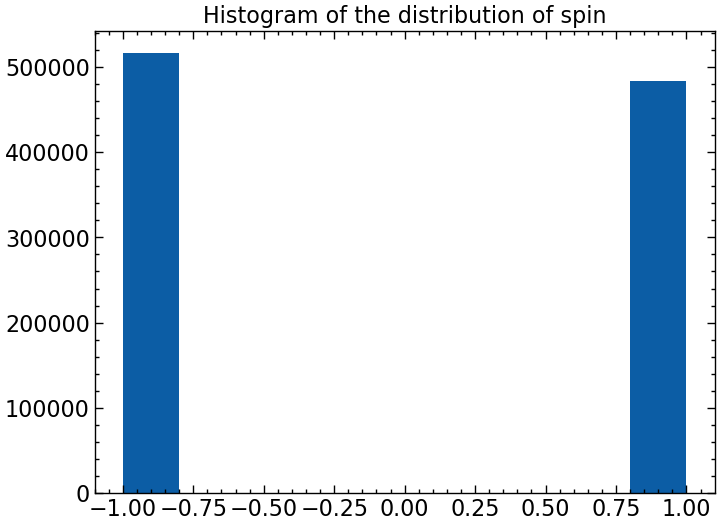

In [57]:
plt.hist(np.ravel(x))
plt.title('Histogram of the distribution of spin')